In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
data = pd.read_csv('/creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
Y = data['Class']
X = data.drop('Class',1)

<ipython-input-4-95dd58168ccf>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('Class',1)


In [5]:
from imblearn.over_sampling import SMOTE

In [6]:
smote = SMOTE()
smote_X, smote_Y = smote.fit_resample(X,Y)
smote_Y.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

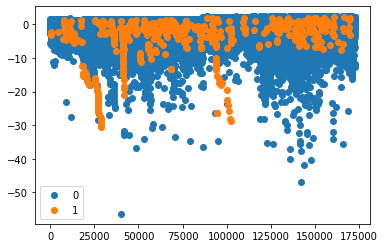

In [7]:
from collections import Counter
from matplotlib import pyplot
def plot_points(X,Y):
    counter_y = Counter(Y)
    for label, _ in counter_y.items():
        row_ix = np.where(Y == label)[0]
        pyplot.scatter(X.iloc[row_ix, 0], X.iloc[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
plot_points(X,Y)

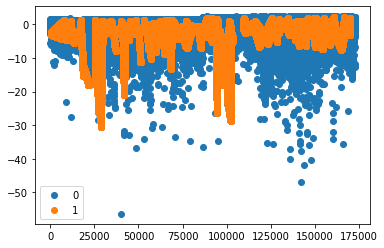

In [8]:
plot_points(smote_X,smote_Y)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(smote_X, smote_Y, test_size=0.5, random_state=0)

In [10]:
n_inputs = smote_X.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
ann = Sequential()
ann.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
ann.add(Dropout(0.5))
ann.add(Dense(32, kernel_initializer='he_normal', activation='relu'))
ann.add(Dropout(0.5))
ann.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

ann.compile(Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 65)                2015      
                                                                 
 dropout (Dropout)           (None, 65)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,160
Trainable params: 4,160
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = ann.fit(smote_X, smote_Y, validation_data=(X_test, y_test), batch_size=700, epochs=15, callbacks=[es], shuffle=True, verbose=2)

Epoch 1/15
813/813 - 6s - loss: 1079.2260 - accuracy: 0.5025 - val_loss: 0.7061 - val_accuracy: 0.4999 - 6s/epoch - 8ms/step
Epoch 2/15
813/813 - 6s - loss: 7.9393 - accuracy: 0.5068 - val_loss: 0.6965 - val_accuracy: 0.4999 - 6s/epoch - 8ms/step
Epoch 3/15
813/813 - 5s - loss: 3.2344 - accuracy: 0.5055 - val_loss: 0.6952 - val_accuracy: 0.4999 - 5s/epoch - 6ms/step
Epoch 4/15
813/813 - 5s - loss: 1.9101 - accuracy: 0.5045 - val_loss: 0.6940 - val_accuracy: 0.4999 - 5s/epoch - 6ms/step
Epoch 5/15
813/813 - 6s - loss: 1.3118 - accuracy: 0.5020 - val_loss: 0.6934 - val_accuracy: 0.4999 - 6s/epoch - 7ms/step
Epoch 6/15
813/813 - 4s - loss: 1.0425 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.4999 - 4s/epoch - 5ms/step
Epoch 7/15
813/813 - 6s - loss: 0.9976 - accuracy: 0.5004 - val_loss: 0.6932 - val_accuracy: 0.4999 - 6s/epoch - 7ms/step
Epoch 8/15
813/813 - 5s - loss: 0.8249 - accuracy: 0.4998 - val_loss: 0.6932 - val_accuracy: 0.4999 - 5s/epoch - 6ms/step
Epoch 9/15
813/813 - 

In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


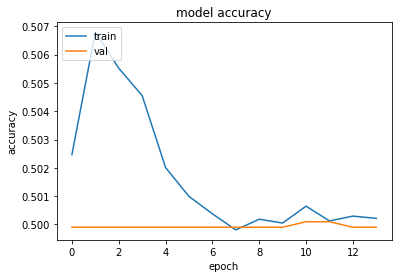

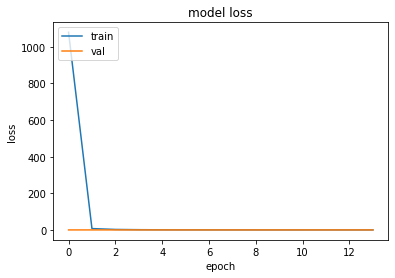

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
import math
def displayMetrics(y_test,y_pred):
    Kappa = metrics.cohen_kappa_score(y_test,y_pred)
    precision = metrics.precision_score(y_test,y_pred)
    f1_score = metrics.f1_score(y_test,y_pred)
    recall = metrics.recall_score(y_test,y_pred)
    specificity = metrics.recall_score(y_test,y_pred,pos_label = 0)
    G_mean = math.sqrt(recall * specificity)
    print({"Kappa":Kappa,"Precision":precision,"Recall":recall,"F1_score":f1_score,"G Mean":G_mean})

In [15]:
from sklearn import metrics
def display_confusion_matrix(actual,predicted):
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()

In [16]:
def roc_curve(y_test,y_pred):
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
  auc = metrics.roc_auc_score(y_test, y_pred)
  plt.plot(fpr,tpr,label="AUC="+str(auc))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

8885/8885 [==============================] - 26s 3ms/step


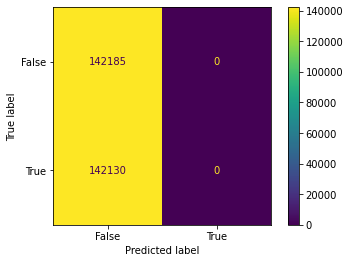

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Kappa': 0.0, 'Precision': 0.0, 'Recall': 0.0, 'F1_score': 0.0, 'G\xa0Mean': 0.0}


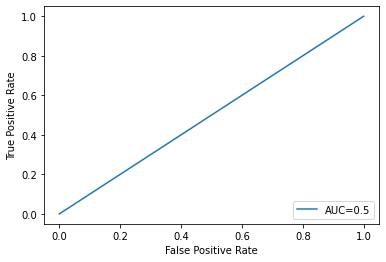

In [17]:
pred_x = ann.predict(X_test)
y_pred = np.round(pred_x).astype(int)
display_confusion_matrix(y_test,y_pred)
displayMetrics(y_test,y_pred)
roc_curve(y_test,y_pred)

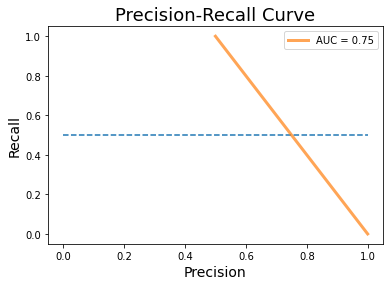

In [18]:
from sklearn.metrics import precision_recall_curve,auc
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred)

#Auc for PR curve
AUC_PRcurve= auc(recall, precision)

plt.figure(1)
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
#plot PR curve
plt.plot(precision, recall, label = "AUC = {:0.2f}".format(AUC_PRcurve), lw = 3, alpha = 0.7)
plt.xlabel('Precision', fontsize = 14)
plt.ylabel('Recall', fontsize = 14)
plt.title('Precision-Recall Curve', fontsize = 18)
plt.legend(loc='best')
plt.show()